<a href="https://colab.research.google.com/github/Storm00212/Data-manipulation-using-python/blob/main/Complex_data_manipulation_with_sample_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

In [42]:
df = sns.load_dataset('titanic')
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [44]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [46]:
(df.isnull().sum()/len(df))*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


In [47]:
# deck has too many null values so I dropped it
df.drop(columns=['deck'],inplace=True)

In [48]:
df['age'].fillna(df['age'].mean(),inplace=True)

/tmp/ipython-input-1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [49]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

/tmp/ipython-input-1024298632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


In [50]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [51]:
df['embark_town'].fillna('Unknown', inplace = True)

/tmp/ipython-input-2095405918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna('Unknown', inplace = True)


In [52]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]


In [55]:
# Label encoding for gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [56]:
# One hot encoding for embarked.
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [57]:
# Feature scaling for numerical columns.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0,3,1,-0.569164,1,0,-0.528033,False,True
1,1,1,0,0.598711,1,0,0.697956,False,False
2,1,3,0,-0.277195,0,0,-0.515109,False,True
3,1,1,0,0.379735,1,0,0.349817,False,True
4,0,3,1,0.379735,0,0,-0.512716,False,True


In [58]:
# Splitting dataset
from sklearn.model_selection import train_test_split
X = df.drop(columns=['survived'])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("Training test shape:", X_train.shape, y_train.shape)
print("Testing test shape:", X_test.shape, y_test.shape)
print("\nCleaned Data Preview:\n", df.head())

Training test shape: (624, 8) (624,)
Testing test shape: (156, 8) (156,)

Cleaned Data Preview:
    survived  pclass  sex       age  sibsp  parch      fare  embarked_Q  \
0         0       3    1 -0.569164      1      0 -0.528033       False   
1         1       1    0  0.598711      1      0  0.697956       False   
2         1       3    0 -0.277195      0      0 -0.515109       False   
3         1       1    0  0.379735      1      0  0.349817       False   
4         0       3    1  0.379735      0      0 -0.512716       False   

   embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


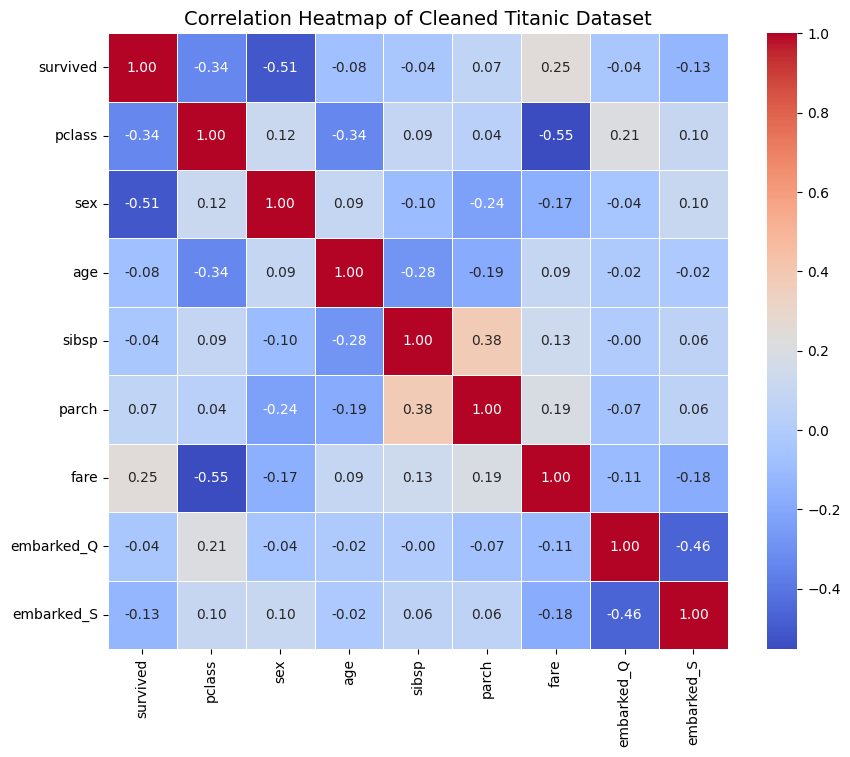

In [59]:
# Heatmap for the cleaned data
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr(numeric_only= True)
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Cleaned Titanic Dataset", fontsize=14)
plt.show()